In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# imports for model selection and grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import hamming_loss, accuracy_score, f1_score, classification_report

In [28]:
# Read the CSV file

file_path = r'C:\Users\ghiat\My Drive\learning and projects\DS\project\data_to_ML_model.csv'

df = pd.read_csv(file_path, delimiter=",", low_memory=False)

In [29]:
df.head()

,Returnees reported in the community,Three most common IDP shelter types - Solid finished apartment,Three most common IDP shelter types - Unfinished or abandoned residential building,Three most common IDP shelter types - Damaged residential building,Three most common IDP shelter types - Non residential structure with one family,Three most common IDP shelter types - Collective center with more than one family,Three most common IDP shelter types - Tent,Proportion of IDPs living in overcrowded shelters,IDP shelter inadequacies - Lack of lighting inside shelter,IDP shelter inadequacies - Lack of lighting around shelter,...,Livelihood support,Education,WASH,Winterisation,Legal services,GBV services,CP services,Explosive hazard risk awareness or removal of explosive contamination,Mental health psychological support,Cash assistance vouchers or cash in hand
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
target_columns = [
    "Shelter",
    "Health",
    "NFIs",
    "Electricity assistance",
    "Food, nutrition",
    "Agricultural supplies",
    "Livelihood support",
    "Education",
    "WASH",
    "Winterisation",
    "Legal services",
    "GBV services",
    "CP services",
    "Explosive hazard risk awareness or removal of explosive contamination",
    "Mental health psychological support",
    "Cash assistance vouchers or cash in hand"
]

In [31]:
# Extract the target DataFrame
target = df[target_columns]

# df_feature = df.drop(columns=target.columns)
df_feature = df.drop(target_columns, axis=1)

In [32]:
# sorting columns by value counts
target = target[target.apply(pd.value_counts).loc[0].sort_values().index]

C:\Users\ghiat\AppData\Local\Temp\ipykernel_5320\4221557671.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  target = target[target.apply(pd.value_counts).loc[0].sort_values().index]


Food, nutrition Food, nutrition
0.0    0.57
1.0    0.43
Name: proportion, dtype: float64
Health Health
0.0    0.76
1.0    0.24
Name: proportion, dtype: float64
WASH WASH
0.0    0.85
1.0    0.15
Name: proportion, dtype: float64
Cash assistance Cash assistance vouchers or cash in hand
0.0    0.87
1.0    0.13
Name: proportion, dtype: float64
Education Education
0.0    0.97
1.0    0.03
Name: proportion, dtype: float64
Winterisation Winterisation
0.0    0.98
1.0    0.02
Name: proportion, dtype: float64
Livelihood support Livelihood support
0.0    0.98
1.0    0.02
Name: proportion, dtype: float64
Legal services Legal services
0.0    0.99
1.0    0.01
Name: proportion, dtype: float64
NFIs NFIs
0.0    0.99
1.0    0.01
Name: proportion, dtype: float64
CP services CP services
0.0    0.99
1.0    0.01
Name: proportion, dtype: float64
Agricultural supplies Agricultural supplies
0.0    0.99
1.0    0.01
Name: proportion, dtype: float64
Electricity assistance Electricity assistance
0.0    0.99
1.0    0

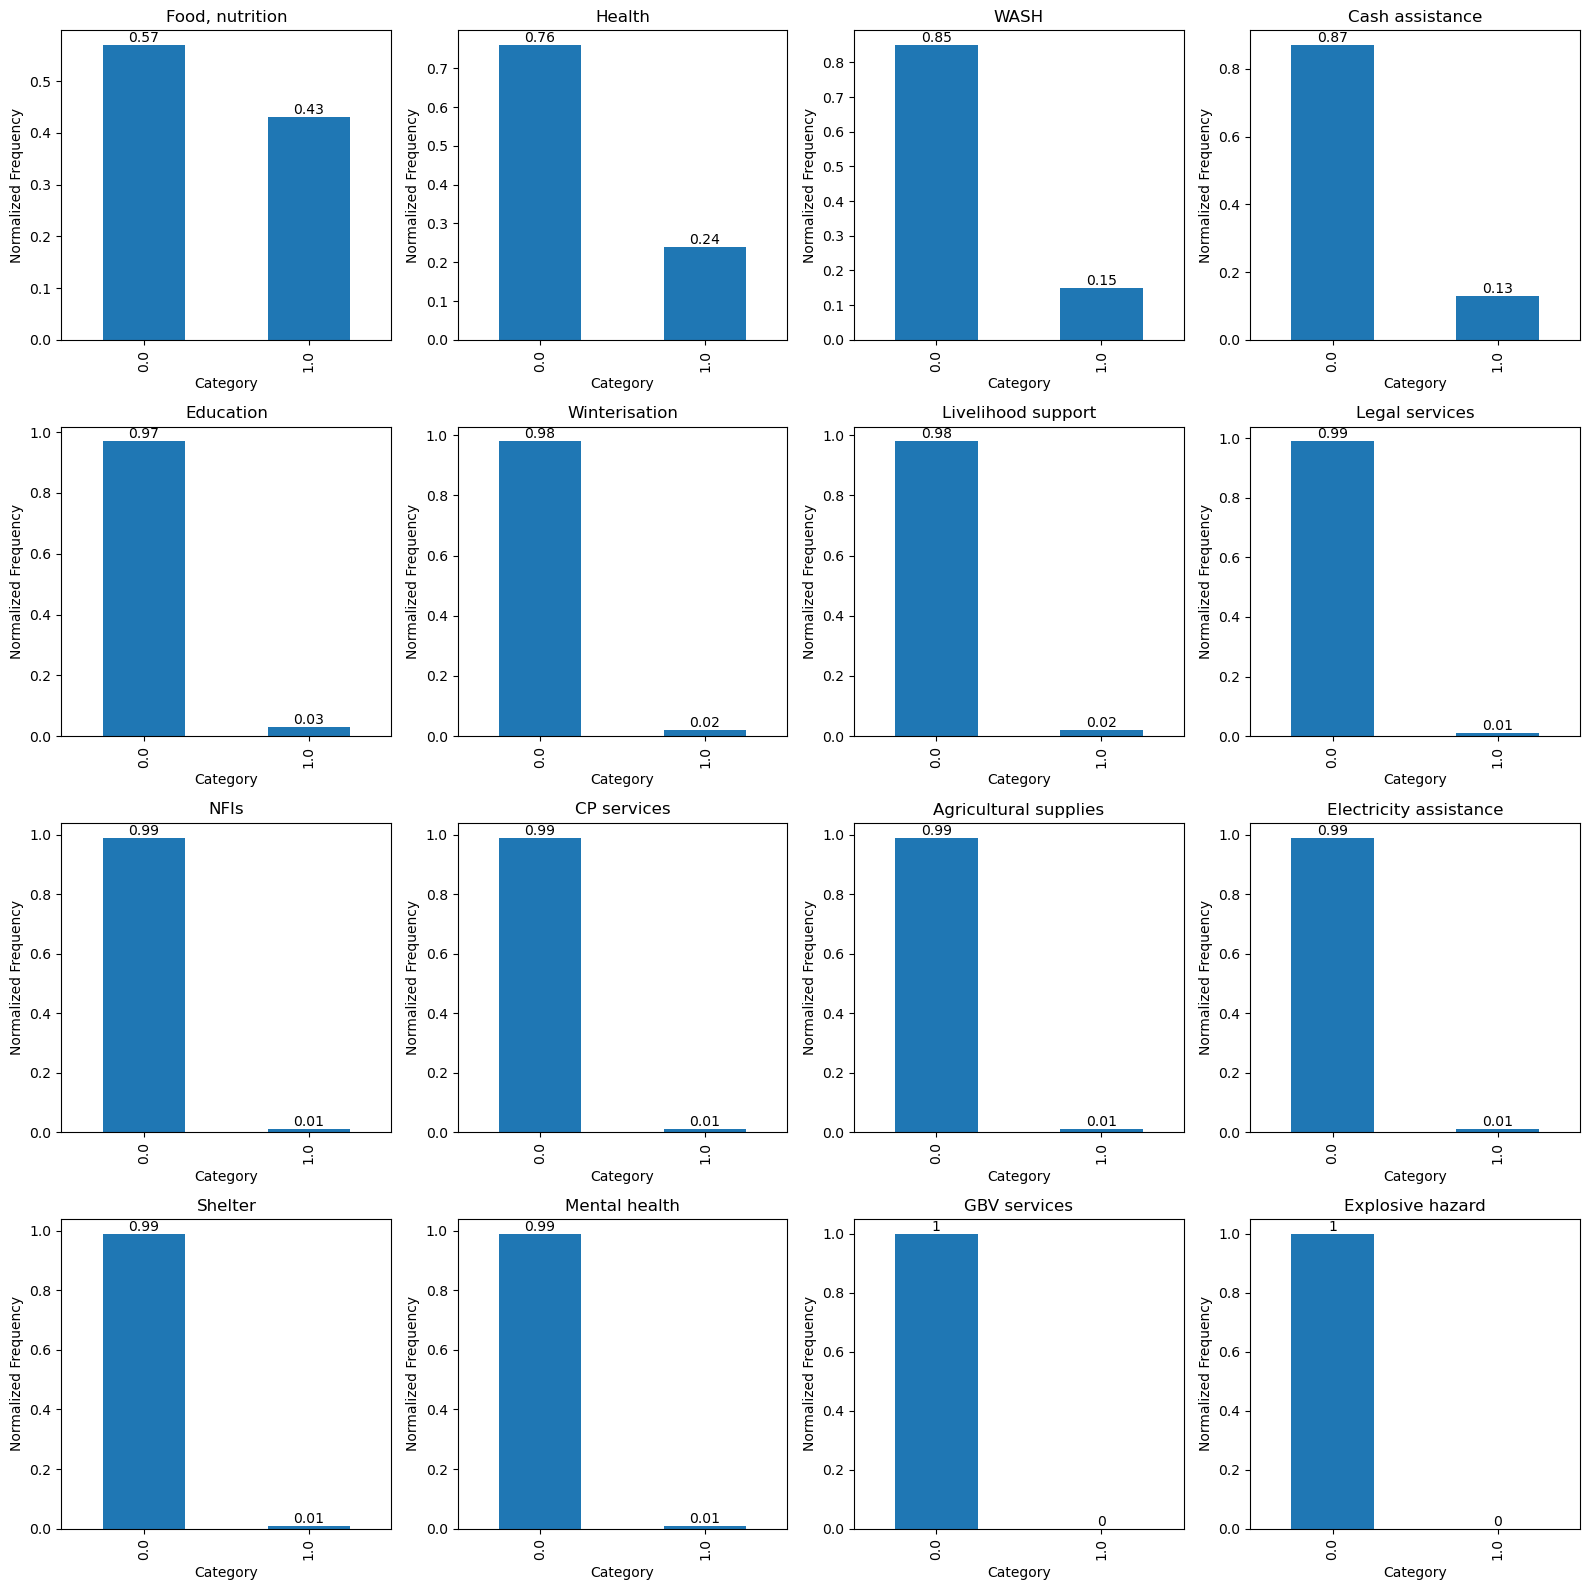

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

for ax, col in zip(axes, target.columns):
    counts = target[col].value_counts(normalize=True).round(2)
    short_name = ' '.join(col.split()[:2])  # Takes only the first two words of the column name
    print(short_name, counts)
    
    counts.plot(kind='bar', ax=ax)
    ax.set_title(short_name)
    ax.set_xlabel('Category')
    ax.set_ylabel('Normalized Frequency')
    ax.bar_label(ax.containers[0])  # Adds numeric labels on each bar

# Remove unused subplots if there are fewer than 16 columns
for ax in axes[len(target.columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [36]:
target = target.iloc[:, :4]
target.shape

(32912, 4)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feature, target, test_size=0.2, random_state=1234)

# Random Forest

In [44]:
# Initialize the base classifier
random_forest_model = MultiOutputClassifier(RandomForestClassifier(random_state=1234, n_estimators=100, n_jobs=-1, class_weight='balanced'))

# Train the model on X_train and Y_train
random_forest_model.fit(X_train, Y_train)

# Predict on X_test
Y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model
print("Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_random_forest)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_random_forest)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_random_forest, target_names=target.columns))

Evaluation Metrics:
Hamming Loss: 0.06178793862980404
Exact Match Accuracy: 0.8035849916451466
Classification Report:
                                          precision    recall  f1-score   support

                         Food, nutrition       0.90      0.92      0.91      2862
                                  Health       0.95      0.88      0.91      1638
                                    WASH       0.90      0.67      0.77      1018
Cash assistance vouchers or cash in hand       0.89      0.57      0.69       828

                               micro avg       0.91      0.82      0.87      6346
                               macro avg       0.91      0.76      0.82      6346
                            weighted avg       0.91      0.82      0.86      6346
                             samples avg       0.49      0.47      0.48      6346



C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
print("Samples with no true labels:", (Y_test.sum(axis=1) == 0).sum())
print("Samples with no predicted labels:", (Y_pred_random_forest.sum(axis=1) == 0).sum())

Samples with no true labels: 2804
Samples with no predicted labels: 3028


In [46]:
# Bagging for Random Forest
bagging_rf = MultiOutputClassifier(BaggingClassifier(estimator=RandomForestClassifier(random_state=1234, n_estimators=100, n_jobs=-1, class_weight='balanced'), n_estimators=10, random_state=1234))
bagging_rf.fit(X_train, Y_train)
Y_pred_bagging_rf = bagging_rf.predict(X_test)

print("Bagging Random Forest - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_bagging_rf)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_bagging_rf)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_bagging_rf, target_names=target.columns))

Bagging Random Forest - Evaluation Metrics:
Hamming Loss: 0.06554762266443871
Exact Match Accuracy: 0.7956858575117728
Classification Report:
                                          precision    recall  f1-score   support

                         Food, nutrition       0.89      0.92      0.91      2862
                                  Health       0.95      0.87      0.91      1638
                                    WASH       0.91      0.63      0.74      1018
Cash assistance vouchers or cash in hand       0.89      0.52      0.66       828

                               micro avg       0.91      0.81      0.86      6346
                               macro avg       0.91      0.74      0.80      6346
                            weighted avg       0.91      0.81      0.85      6346
                             samples avg       0.49      0.47      0.47      6346



C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
# Boosting for Random Forest
boosting_rf = MultiOutputClassifier(AdaBoostClassifier(estimator=RandomForestClassifier(random_state=1234, n_estimators=100, class_weight='balanced'), n_estimators=50, random_state=1234))
boosting_rf.fit(X_train, Y_train)
Y_pred_boosting_rf = boosting_rf.predict(X_test)

print("Boosting Random Forest - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_boosting_rf)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_boosting_rf)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_boosting_rf, target_names=target.columns))

C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Boosting Random Forest - Evaluation Metrics:
Hamming Loss: 0.06816800850675983
Exact Match Accuracy: 0.7798875892450251
Classification Report:
                                          precision    recall  f1-score   support

                         Food, nutrition       0.90      0.87      0.89      2862
                                  Health       0.95      0.89      0.92      1638
                                    WASH       0.91      0.66      0.77      1018
Cash assistance vouchers or cash in hand       0.89      0.47      0.62       828

                               micro avg       0.92      0.79      0.85      6346
                               macro avg       0.91      0.72      0.80      6346
                            weighted avg       0.91      0.79      0.84      6346
                             samples avg       0.47      0.45      0.45      6346



C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Support Vector Machine

In [48]:
# Initialize SVM classifier with optimized parameters
svm_model = MultiOutputClassifier(
    LinearSVC(random_state=1234, C=1.0, max_iter=5000, class_weight='balanced')  # Increased iterations for convergence
)

# Train the model
svm_model.fit(X_train, Y_train)

# Predict
Y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_svm)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_svm)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm, target_names=target.columns, zero_division=0))


SVM - Evaluation Metrics:
Hamming Loss: 0.12661400577244417
Exact Match Accuracy: 0.6497037824699985
Classification Report:
                                          precision    recall  f1-score   support

                         Food, nutrition       0.84      0.95      0.89      2862
                                  Health       0.78      0.92      0.84      1638
                                    WASH       0.52      0.88      0.65      1018
Cash assistance vouchers or cash in hand       0.41      0.88      0.56       828

                               micro avg       0.67      0.92      0.78      6346
                               macro avg       0.64      0.91      0.74      6346
                            weighted avg       0.71      0.92      0.80      6346
                             samples avg       0.41      0.53      0.45      6346



In [49]:
print("Samples with no true labels:", (Y_test.sum(axis=1) == 0).sum())
print("Samples with no predicted labels:", (Y_pred_svm.sum(axis=1) == 0).sum())

Samples with no true labels: 2804
Samples with no predicted labels: 2719


In [50]:
# Bagging for SVM

bagging_svm = MultiOutputClassifier(BaggingClassifier(estimator=LinearSVC(random_state=1234, C=1.0, max_iter=5000, class_weight='balanced'), n_estimators=10, random_state=1234))
bagging_svm.fit(X_train, Y_train)
Y_pred_bagging_svm = bagging_svm.predict(X_test)

print("Bagging SVM - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_bagging_svm)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_bagging_svm)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_bagging_svm, target_names=target.columns))

Bagging SVM - Evaluation Metrics:
Hamming Loss: 0.12042381892754063
Exact Match Accuracy: 0.6650463314598207
Classification Report:
                                          precision    recall  f1-score   support

                         Food, nutrition       0.84      0.95      0.89      2862
                                  Health       0.79      0.92      0.85      1638
                                    WASH       0.54      0.86      0.66      1018
Cash assistance vouchers or cash in hand       0.42      0.85      0.57       828

                               micro avg       0.69      0.91      0.79      6346
                               macro avg       0.65      0.90      0.74      6346
                            weighted avg       0.72      0.91      0.80      6346
                             samples avg       0.42      0.52      0.45      6346



C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Boosting for SVM

boosting_svm = MultiOutputClassifier(AdaBoostClassifier(estimator=LinearSVC(random_state=1234, C=1.0, max_iter=5000, class_weight='balanced'), n_estimators=50, random_state=1234, algorithm='SAMME'))
boosting_svm.fit(X_train, Y_train)
Y_pred_boosting_svm = boosting_svm.predict(X_test)

print("Boosting SVM - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_boosting_svm)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_boosting_svm)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_boosting_svm, target_names=target.columns))

Boosting SVM - Evaluation Metrics:
Hamming Loss: 0.14119702263405742
Exact Match Accuracy: 0.6206896551724138
Classification Report:
                                          precision    recall  f1-score   support

                         Food, nutrition       0.82      0.89      0.85      2862
                                  Health       0.81      0.77      0.79      1638
                                    WASH       0.51      0.82      0.63      1018
Cash assistance vouchers or cash in hand       0.40      0.81      0.53       828

                               micro avg       0.66      0.84      0.74      6346
                               macro avg       0.63      0.82      0.70      6346
                            weighted avg       0.71      0.84      0.76      6346
                             samples avg       0.39      0.48      0.41      6346



C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# crosstab

In [65]:
Y_pred_boosting_svm_df = pd.DataFrame(Y_pred_boosting_svm, columns=target.columns)

# Compute and print normalized cross tab for each label
for col in target.columns:
    norm_crosstab = pd.crosstab(Y_test[col], Y_pred_boosting_svm_df[col], normalize='index')
    print(norm_crosstab.round(2), "\n","\n")

Food, nutrition   0.0   1.0
Food, nutrition            
0.0              0.54  0.46
1.0              0.57  0.43 
 

Health   0.0   1.0
Health            
0.0     0.77  0.23
1.0     0.71  0.29 
 

WASH   0.0   1.0
WASH            
0.0   0.76  0.24
1.0   0.72  0.28 
 

Cash assistance vouchers or cash in hand   0.0   1.0
Cash assistance vouchers or cash in hand            
0.0                                       0.76  0.24
1.0                                       0.71  0.29 
 



In [68]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Extract decision scores from each binary classifier
decision_scores = np.column_stack([estimator.decision_function(X_test) for estimator in svm_model.estimators_])

# Compute AUC for each label
for i, col in enumerate(target.columns):
    auc = roc_auc_score(Y_test[col], decision_scores[:, i])
    print(f"{col} AUC: {auc:.2f}")

# Compute macro-average AUC
macro_auc = roc_auc_score(Y_test, decision_scores, average='macro')
print(f"Macro AUC: {macro_auc:.2f}")


Food, nutrition AUC: 0.96
Health AUC: 0.97
WASH AUC: 0.94
Cash assistance vouchers or cash in hand AUC: 0.93
Macro AUC: 0.95


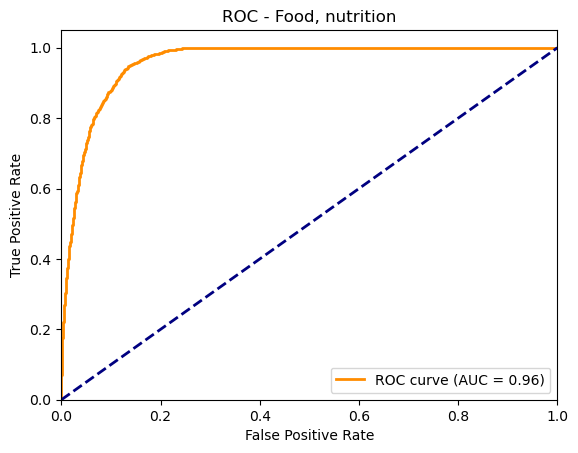

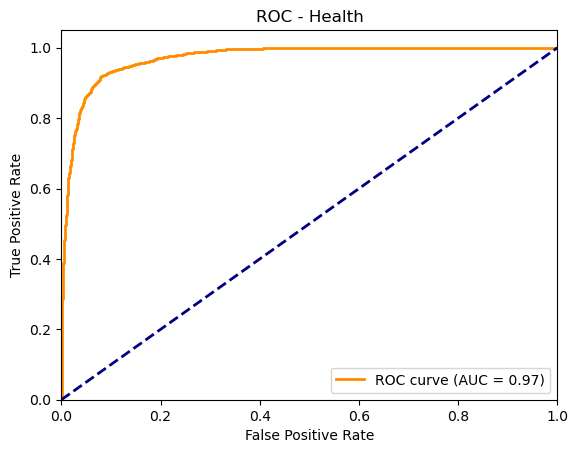

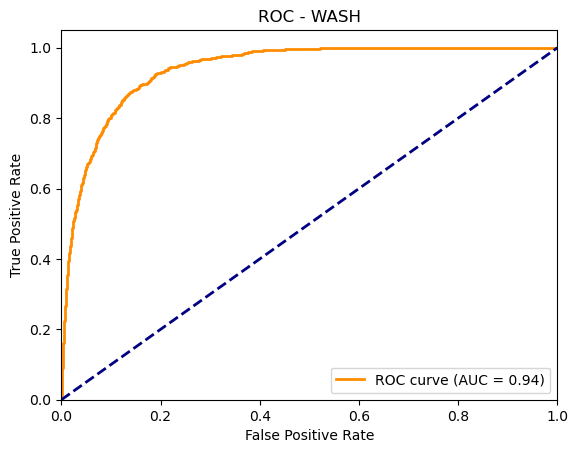

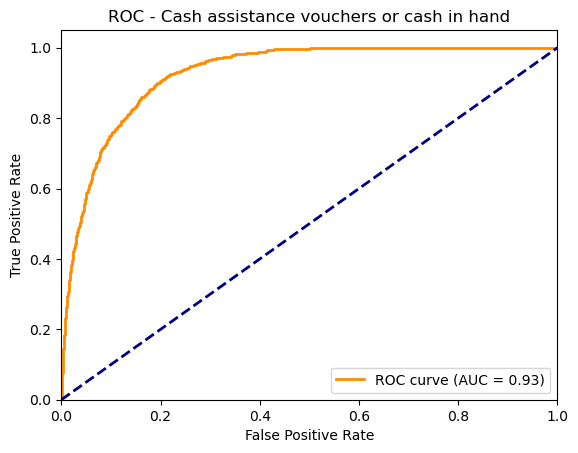

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Extract decision scores from each binary classifier
decision_scores = np.column_stack([estimator.decision_function(X_test) for estimator in svm_model.estimators_])

# Plot ROC curve for each label
for i, col in enumerate(target.columns):
    fpr, tpr, thresholds = roc_curve(Y_test[col], decision_scores[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC - {col}')
    plt.legend(loc="lower right")
    plt.show()


C:\Users\ghiat\AppData\Local\Temp\ipykernel_5320\2752051033.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


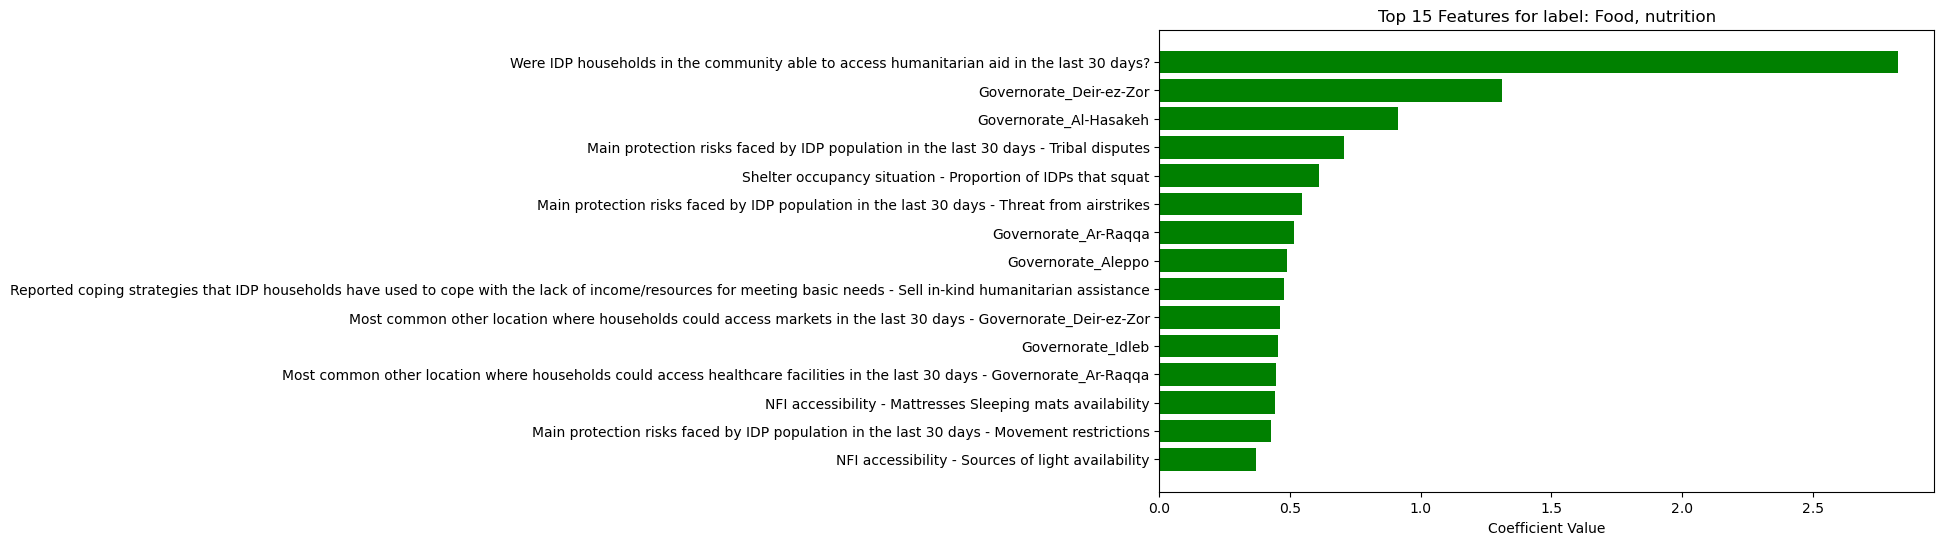

C:\Users\ghiat\AppData\Local\Temp\ipykernel_5320\2752051033.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


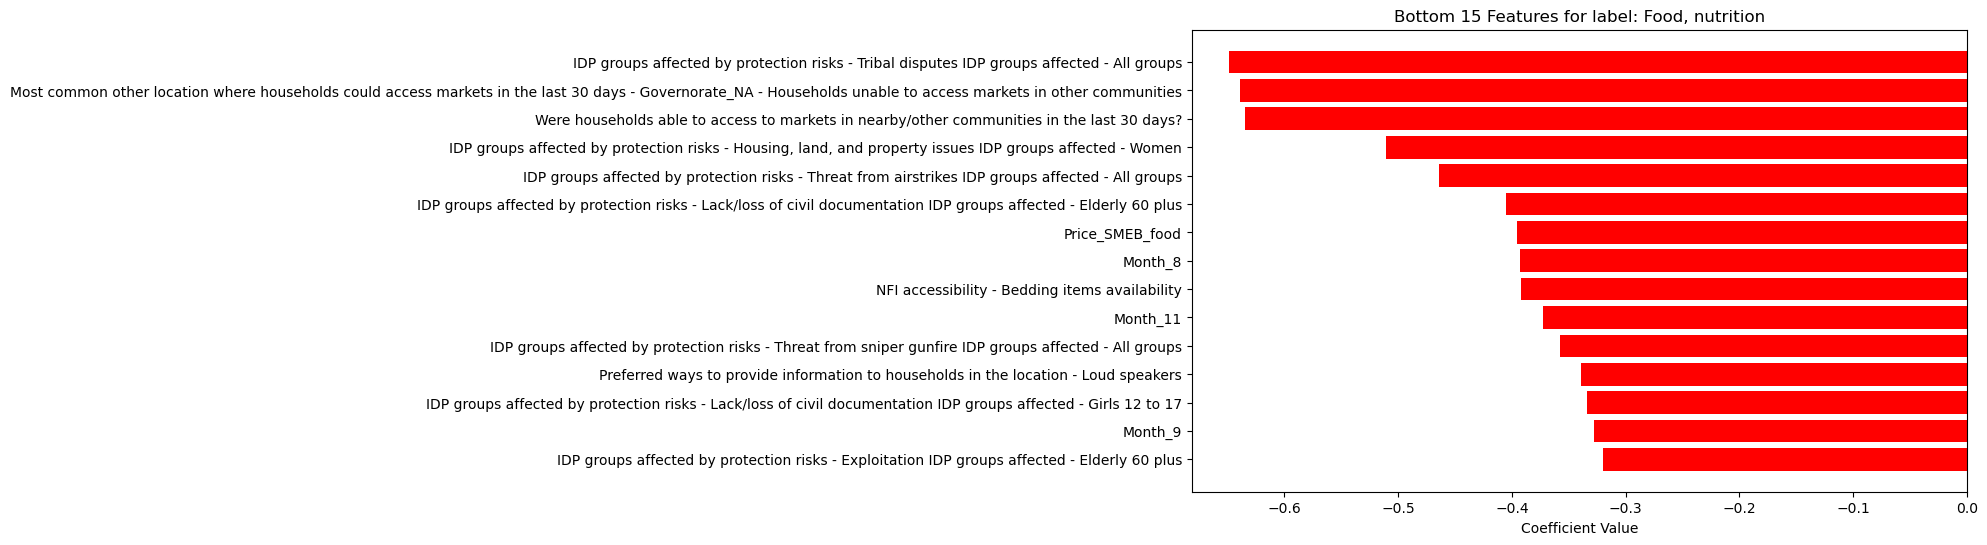

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train is a DataFrame so that we have feature names
feature_names = X_train.columns

# Choose a target label index to inspect (e.g., 0 for the first label)
label_index = 0  # change this index to examine a different label
classifier = svm_model.estimators_[label_index]

# For LinearSVC, coefficients are stored in classifier.coef_ with shape (1, n_features)
# We flatten it to get a 1D array of coefficients
coefficients = classifier.coef_.flatten()

# Create a DataFrame with features and their corresponding coefficients
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# Sort the DataFrame by coefficient values in descending order
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)

# Extract the top 15 features (highest coefficients)
top15 = coef_df_sorted.head(15)
# Extract the bottom 15 features (lowest coefficients)
bottom15 = coef_df_sorted.tail(15)

# Plot top 15 features (largest coefficients)
plt.figure(figsize=(10, 6))
# Reverse the order so the highest value is at the top of the chart
plt.barh(top15['feature'][::-1], top15['coefficient'][::-1], color='green')
plt.xlabel('Coefficient Value')
plt.title(f"Top 15 Features for label: {target.columns[label_index]}")
plt.tight_layout()
plt.show()

# Plot bottom 15 features (smallest coefficients)
plt.figure(figsize=(10, 6))
plt.barh(bottom15['feature'], bottom15['coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.title(f"Bottom 15 Features for label: {target.columns[label_index]}")
plt.tight_layout()
plt.show()


In [74]:
!pip install shap

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.8 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 645.3 kB/s eta 0:00:03
   ---------------------- ----------------- 1.6/2.8 MB 705.1 kB/s eta 0:00:02
   ------------------------- -------------- 1.8/2.8 MB 756.9 kB/s eta 0:00:02
   ------------------------

In [89]:
# Use a sample from X_train as background
background = X_train.sample(n=100, random_state=1234)

Explaining target: Food, nutrition


100%|████████████████████████████████████████████████████████████████████████| 50/50 [02:59<00:00,  3.60s/it]
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


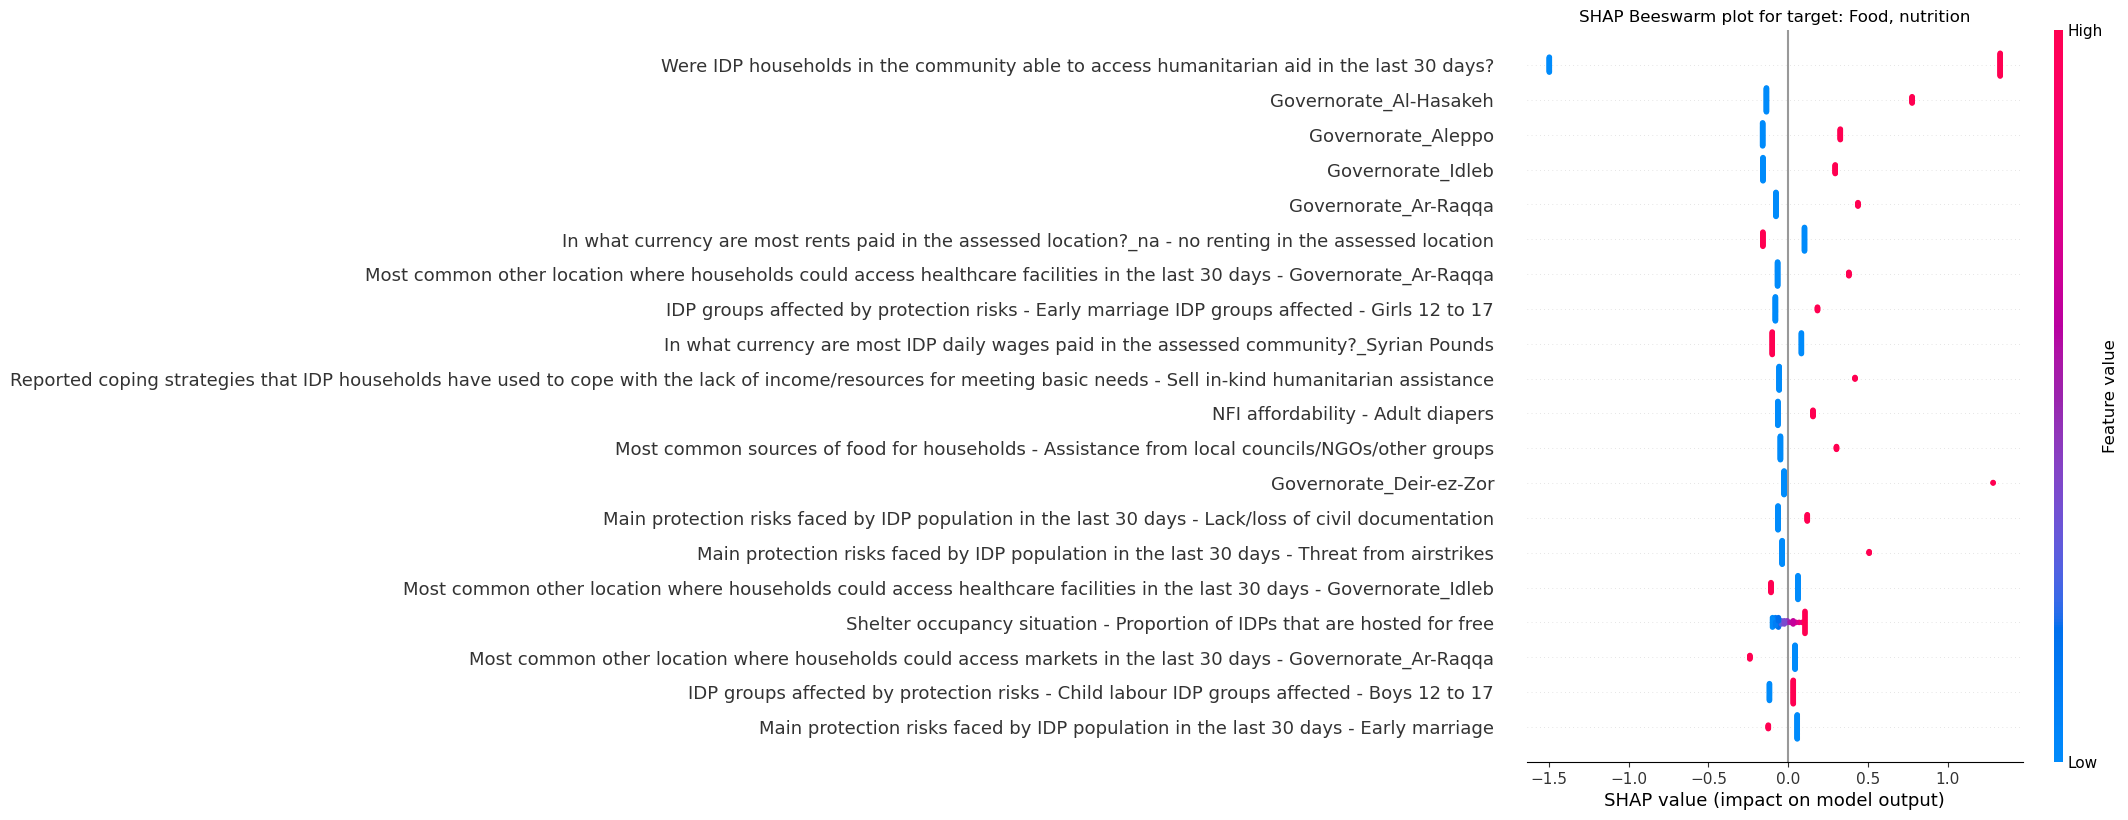

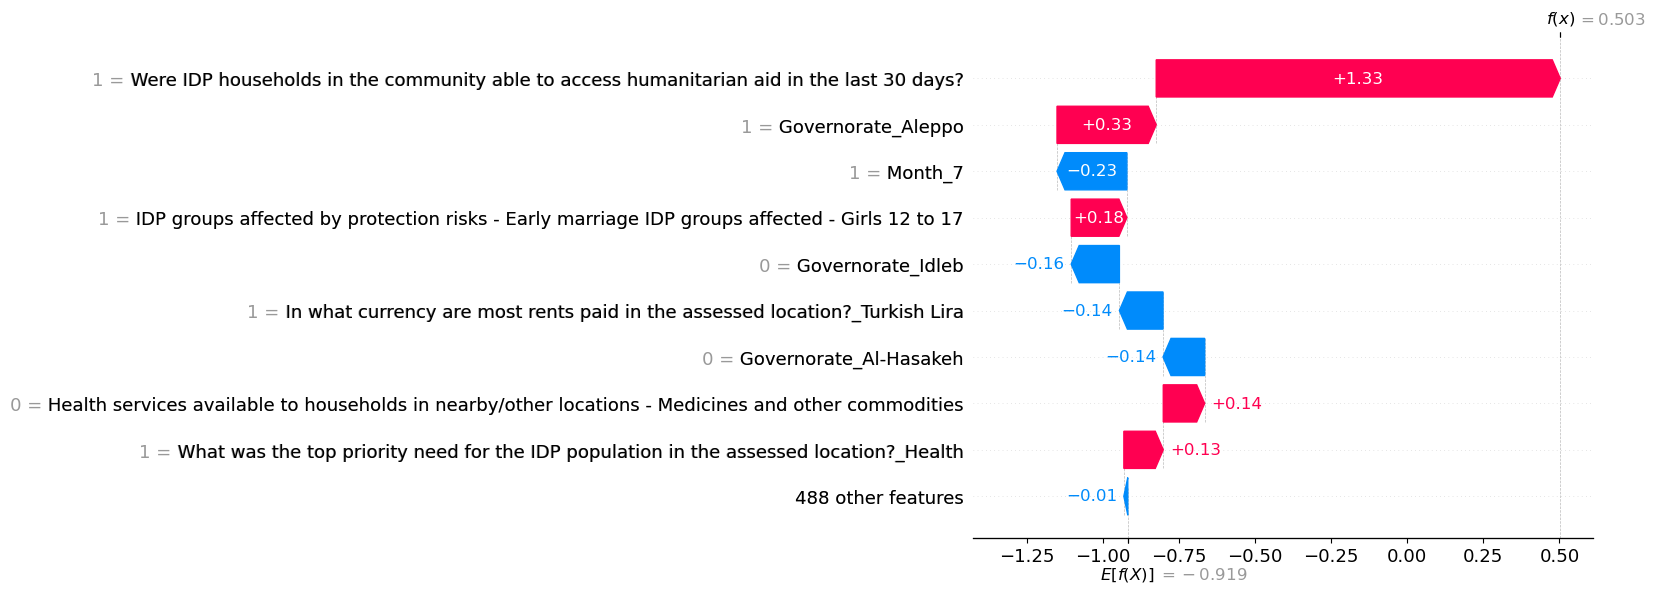

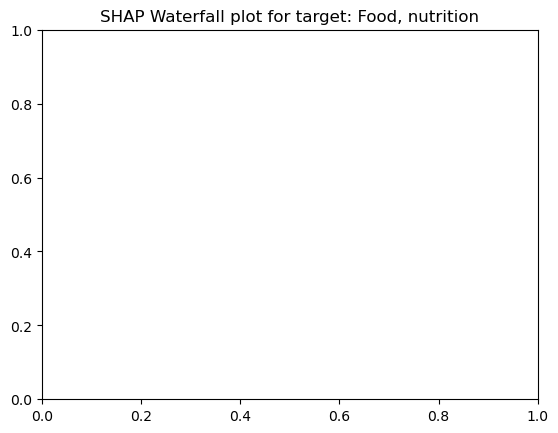

Explaining target: Health


100%|████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.20s/it]
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


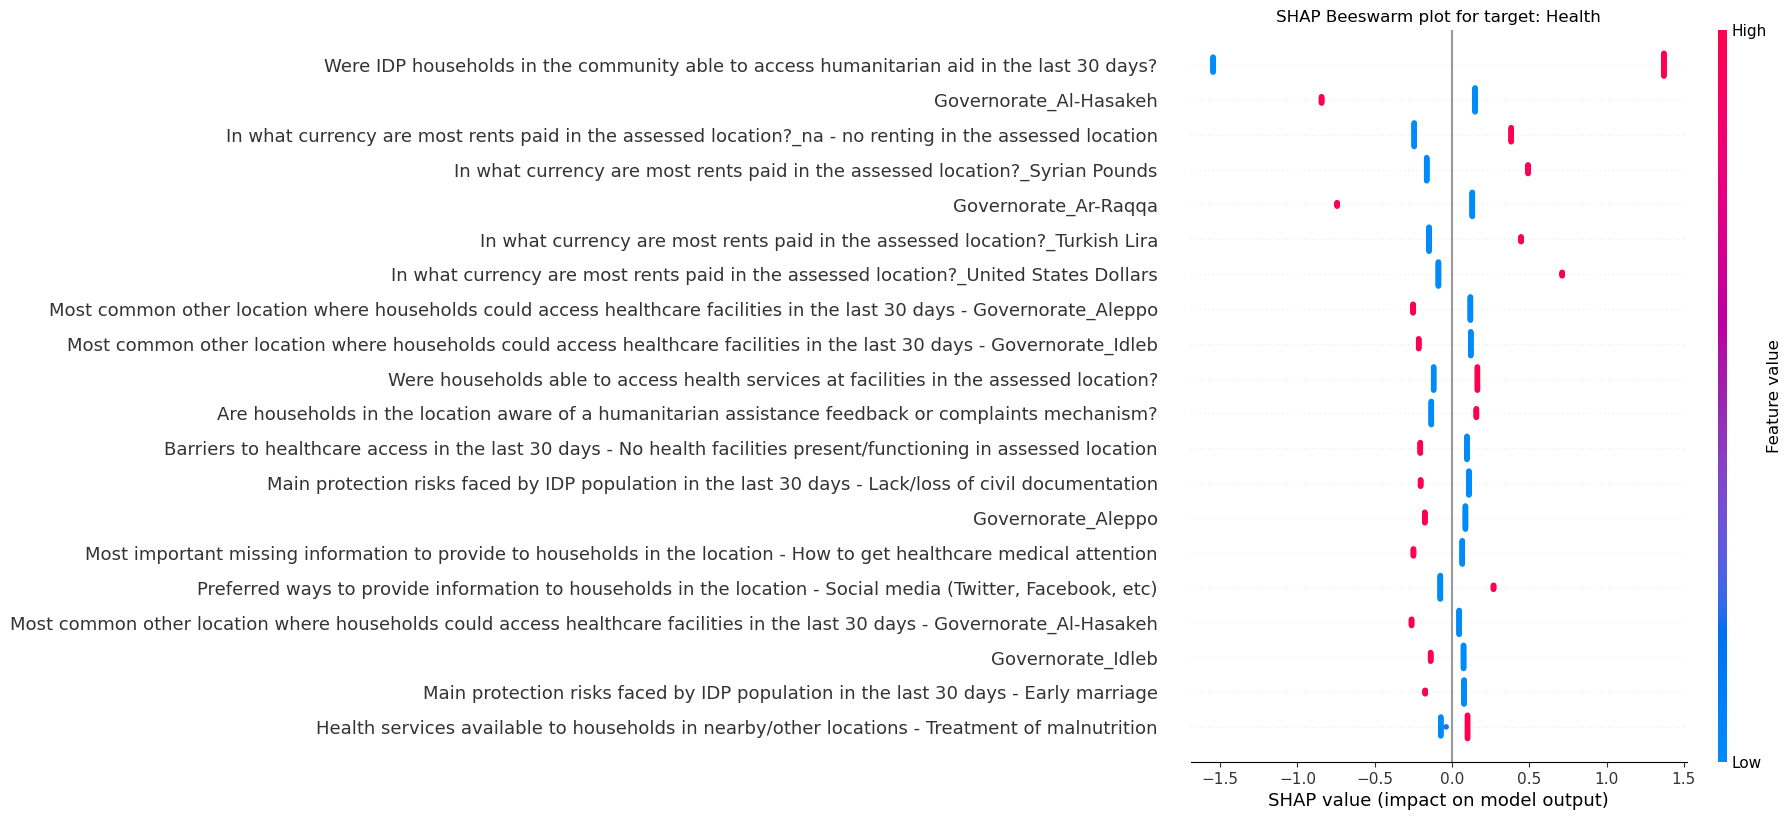

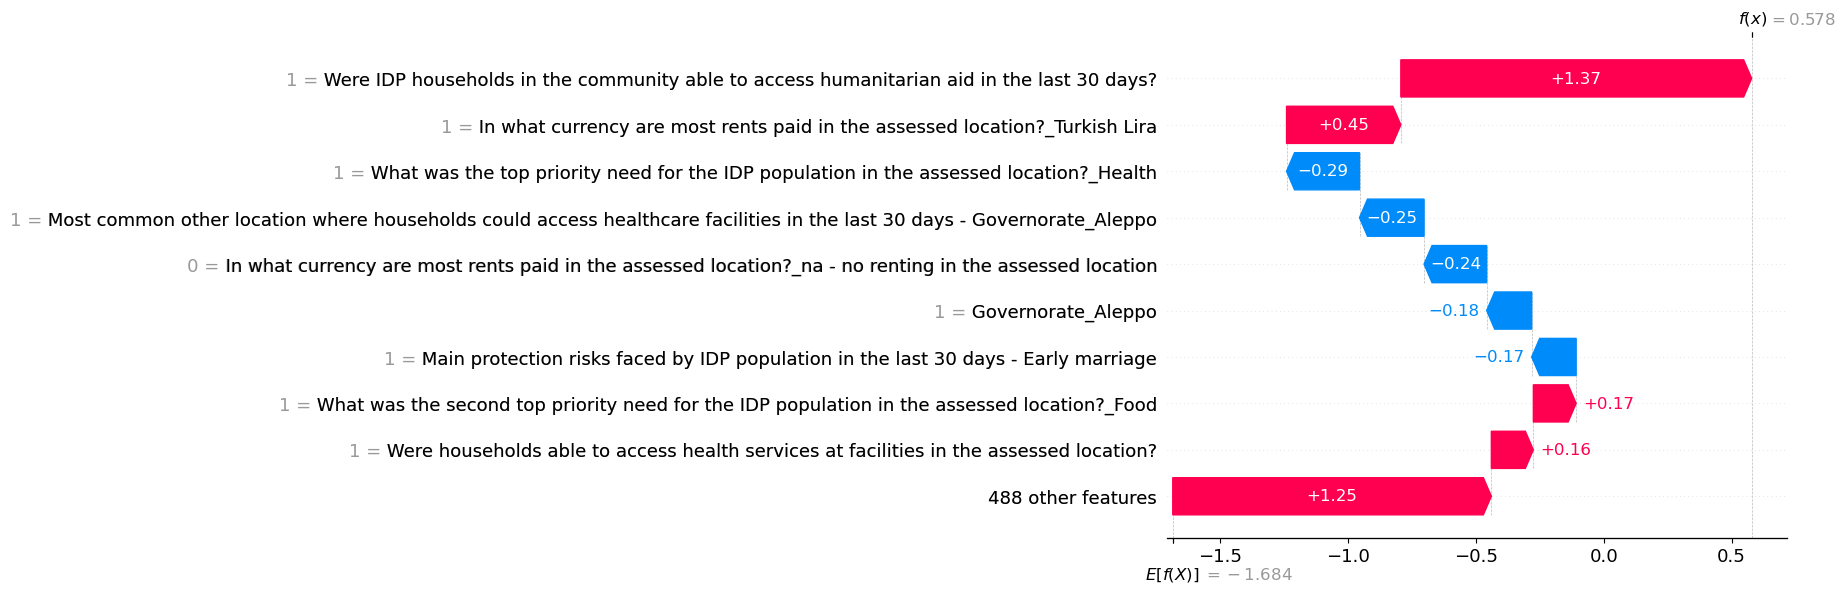

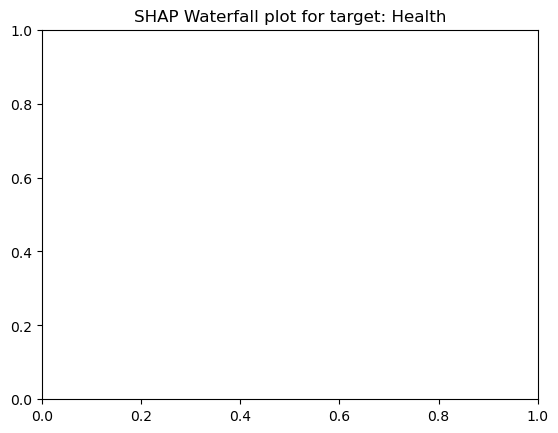

Explaining target: WASH


100%|████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.16s/it]
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


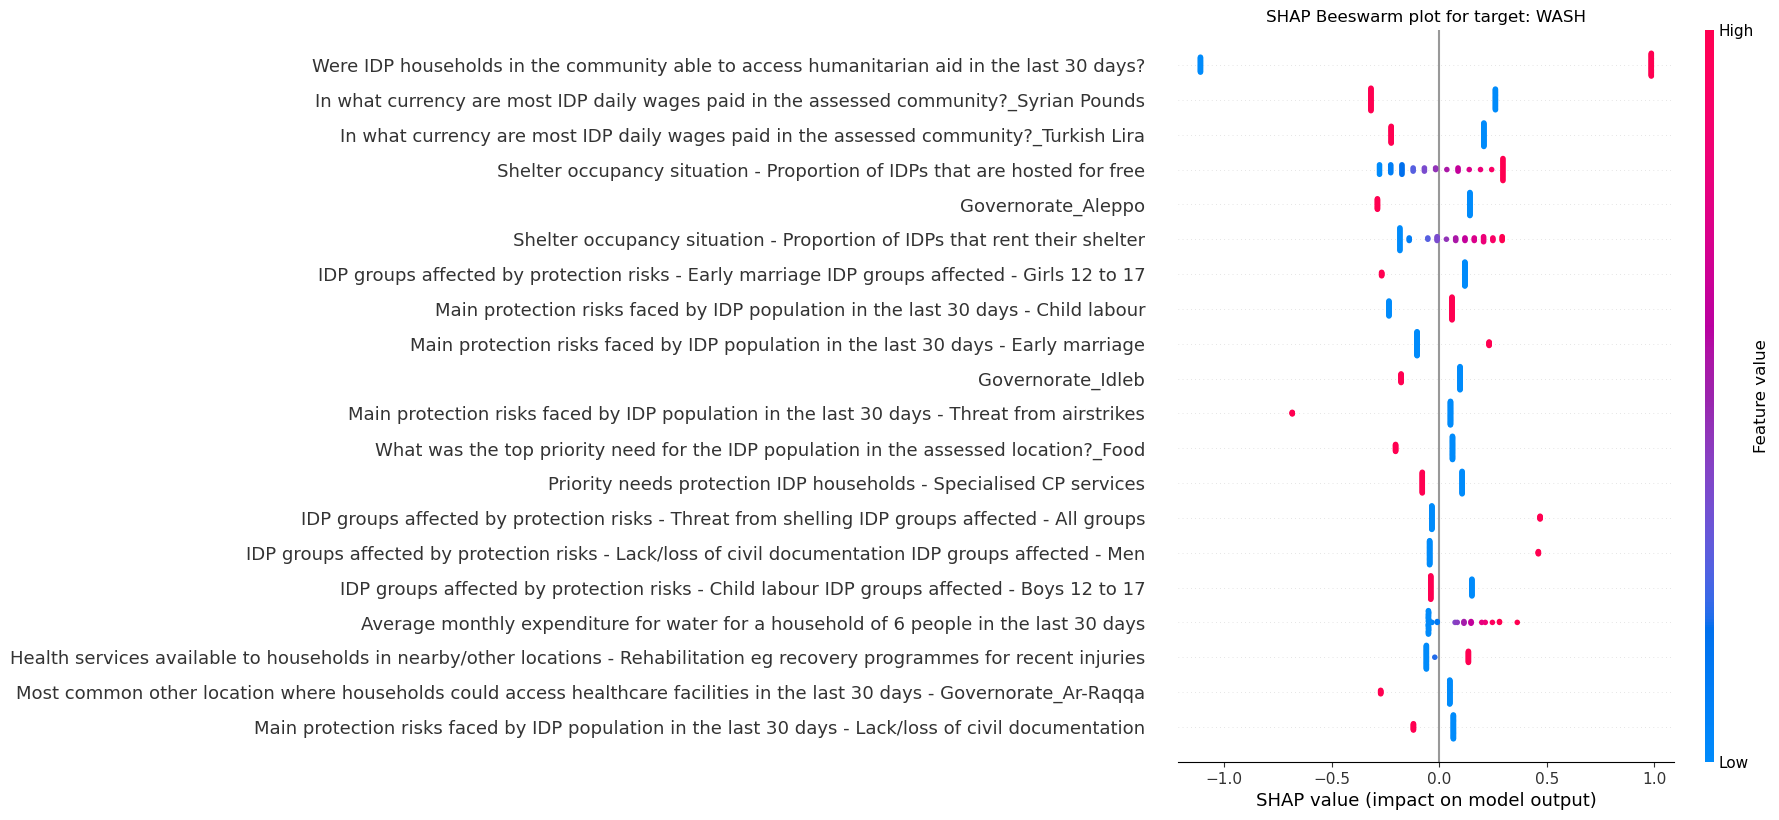

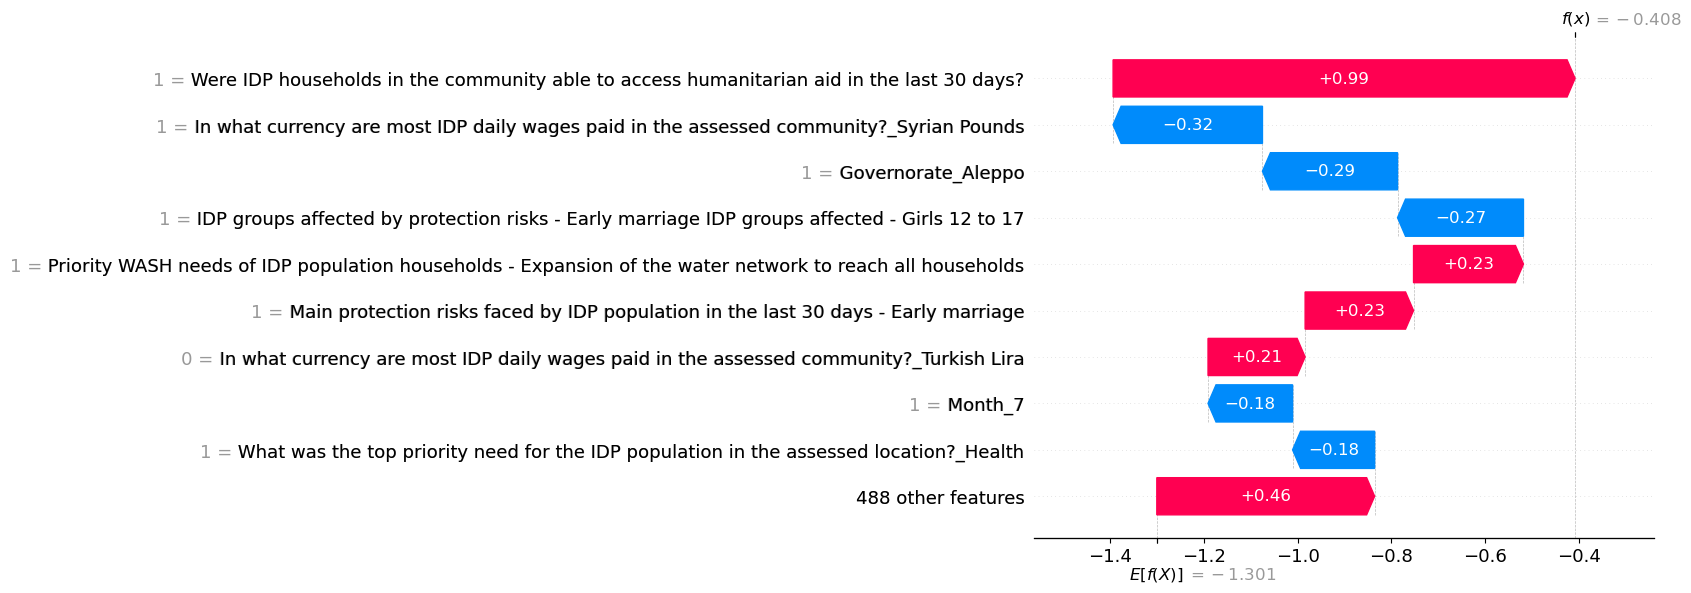

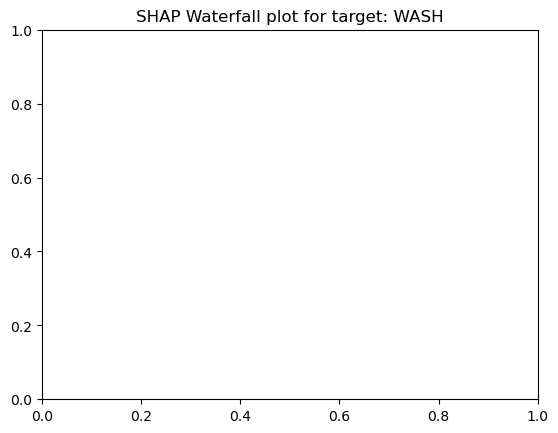

Explaining target: Cash assistance vouchers or cash in hand


100%|████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]
C:\Users\ghiat\anaconda3\envs\ds_env\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


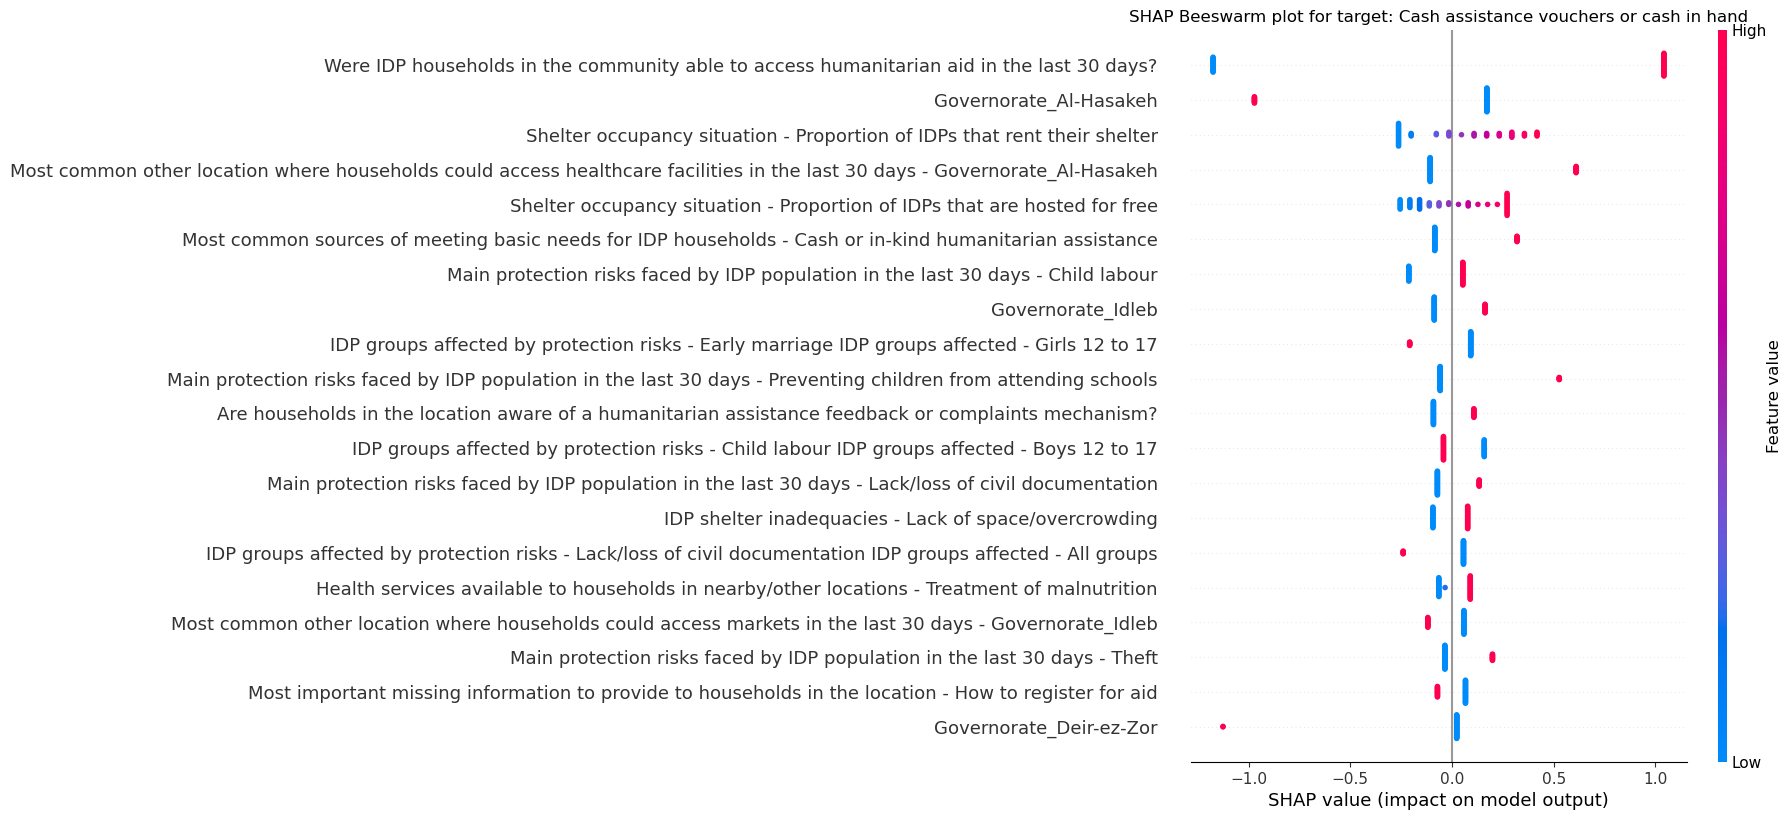

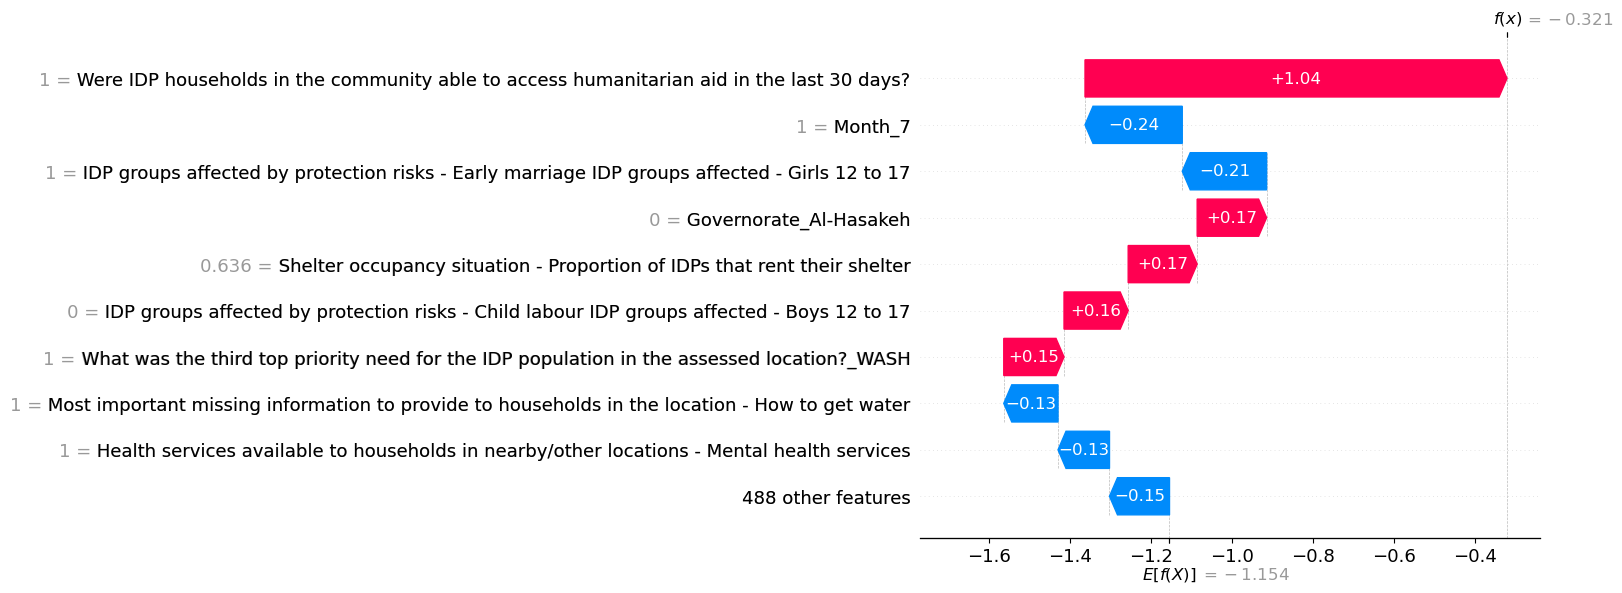

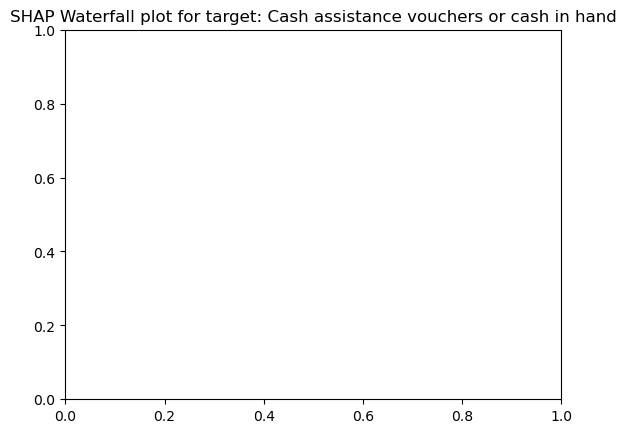

'\n    # Stacked force plot for all instances in the sample\n    shap.force_plot(explainer.expected_value, shap_values, X_test_sample)\n    plt.title(f"SHAP Stacked Force plot for target: {target_name}")\n    plt.show()\n\n    # Bar plot\n    shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)\n    plt.title(f"SHAP Bar plot for target: {target_name}")\n    plt.show()\n\n    # Dependence plots for the top 3 features\n    abs_shap = np.abs(shap_values).mean(axis=0)\n    top_features = np.argsort(abs_shap)[-3:]  # indices of top 3 features\n    for idx in top_features:\n        feature_name = X_test_sample.columns[idx]\n        shap.dependence_plot(feature_name, shap_values, X_test_sample, show=False)\n        plt.title(f"SHAP Dependence plot for {feature_name} (target: {target_name})")\n        plt.show()\n'

In [91]:
for i, estimator in enumerate(svm_model.estimators_):
    target_name = target.columns[i]
    print(f"Explaining target: {target_name}")

    def model_predict(x):
        # If KernelExplainer calls the function with a numpy array,
        # convert it back to a DataFrame with the original column names.
        if isinstance(x, np.ndarray):
            x = pd.DataFrame(x, columns=X_train.columns)
        return estimator.decision_function(x)

    # Pass background as a numpy array (KernelExplainer will call model_predict)
    explainer = shap.KernelExplainer(model_predict, background.values)

    # Use a subset of X_test for faster computation
    X_test_sample = X_test.iloc[:50]
    # Compute SHAP values using the numpy array version of X_test_sample
    shap_values = explainer.shap_values(X_test_sample.values)

    # Beeswarm plot (dot style)
    
    shap.summary_plot(shap_values, X_test_sample, plot_type="dot", show=False)
    plt.title(f"SHAP Beeswarm plot for target: {target_name}")
    plt.show()

    # Waterfall plot for the first instance
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[0],
            base_values=explainer.expected_value,
            data=X_test_sample.iloc[0]
        )
    )
    plt.title(f"SHAP Waterfall plot for target: {target_name}")
    plt.show()
    
"""
    # Stacked force plot for all instances in the sample
    shap.force_plot(explainer.expected_value, shap_values, X_test_sample)
    plt.title(f"SHAP Stacked Force plot for target: {target_name}")
    plt.show()

    # Bar plot
    shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
    plt.title(f"SHAP Bar plot for target: {target_name}")
    plt.show()

    # Dependence plots for the top 3 features
    abs_shap = np.abs(shap_values).mean(axis=0)
    top_features = np.argsort(abs_shap)[-3:]  # indices of top 3 features
    for idx in top_features:
        feature_name = X_test_sample.columns[idx]
        shap.dependence_plot(feature_name, shap_values, X_test_sample, show=False)
        plt.title(f"SHAP Dependence plot for {feature_name} (target: {target_name})")
        plt.show()
"""

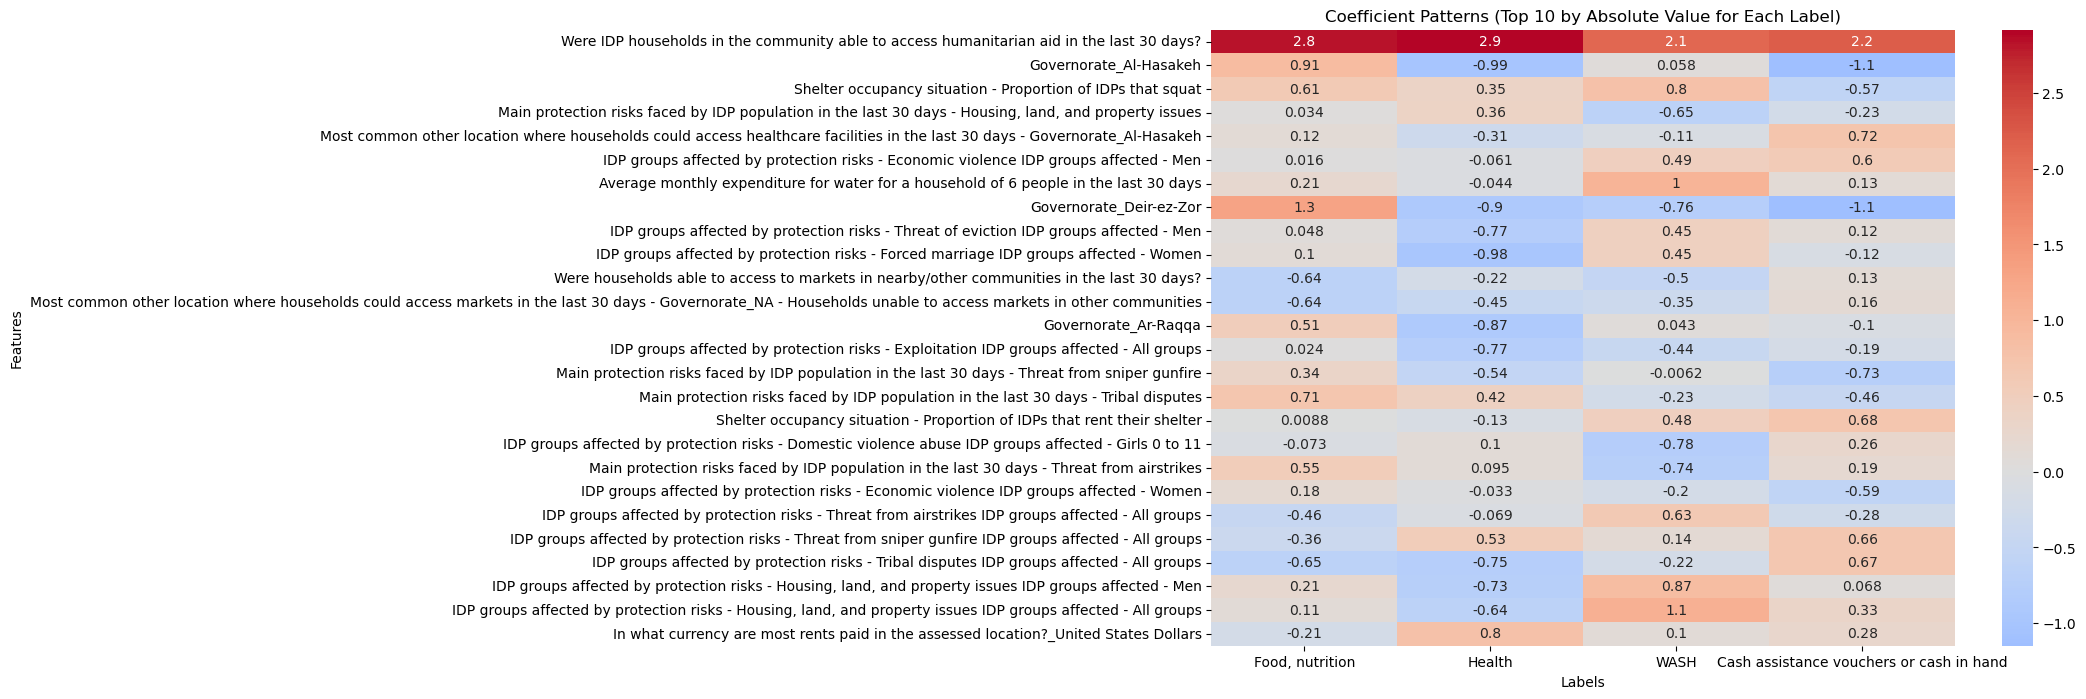

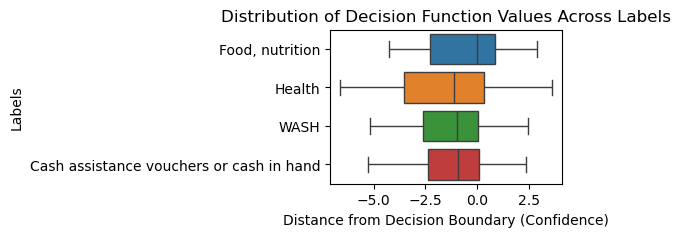

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Comparative Analysis of Coefficient Patterns
coef_dict = {}
for i, estimator in enumerate(svm_model.estimators_):
    label = target.columns[i]
    # Get coefficients (flatten if needed)
    coef = estimator.coef_.flatten()  
    coef_dict[label] = coef

# Create DataFrame with features as rows and labels as columns
coef_df = pd.DataFrame(coef_dict, index=X_train.columns)

# --- Step 1 Modification: Show only top 20 features per label by absolute coefficient ---
top_features = []
for label in coef_df.columns:
    # Get top 20 features with largest absolute coefficients for this label
    top_10 = coef_df[label].abs().nlargest(10).index
    top_features.extend(top_10)

# Make a unique set in case of overlap
unique_top_features = list(set(top_features))
# Subset DataFrame to just these top features
coef_df_subset = coef_df.loc[unique_top_features]

# Plot heatmap of the subset
plt.figure(figsize=(12, 8))
sns.heatmap(coef_df_subset, cmap='coolwarm', center=0, annot=True)
plt.title("Coefficient Patterns (Top 10 by Absolute Value for Each Label)")
plt.xlabel("Labels")
plt.ylabel("Features")
plt.show()

# 2. Distribution of Predictions (Decision Function Values)
preds = {}
for i, estimator in enumerate(svm_model.estimators_):
    label = target.columns[i]
    # Compute decision function values for X_test
    decision_vals = estimator.decision_function(X_test)
    preds[label] = decision_vals

# Create a DataFrame where each column is the decision function values for a label
preds_df = pd.DataFrame(preds)

plt.figure(figsize=(3, 2))
sns.boxplot(data=preds_df, orient="h")
plt.title("Distribution of Decision Function Values Across Labels")
plt.xlabel("Distance from Decision Boundary (Confidence)")
plt.ylabel("Labels")
plt.show()


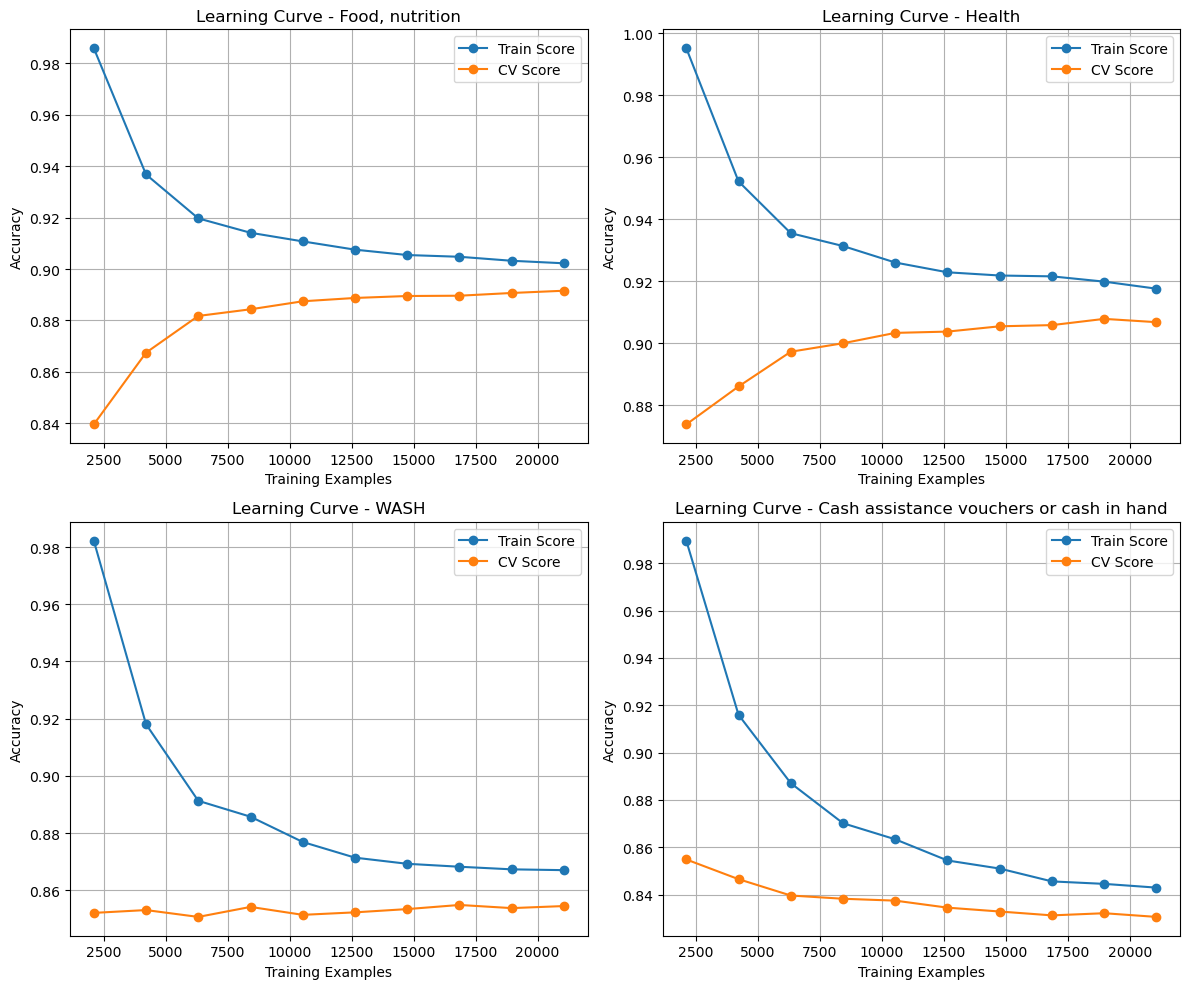

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(target.columns):
    y_train_feature = Y_train[col]
    estimator = LinearSVC(random_state=1234, C=1.0, max_iter=5000, class_weight='balanced')
    
    train_sizes, train_scores, cv_scores = learning_curve(
        estimator, X_train, y_train_feature, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    axes[idx].plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Train Score')
    axes[idx].plot(train_sizes, np.mean(cv_scores, axis=1), 'o-', label='CV Score')
    axes[idx].set_title(f"Learning Curve - {col}")
    axes[idx].set_xlabel("Training Examples")
    axes[idx].set_ylabel("Accuracy")
    axes[idx].grid(True)
    axes[idx].legend(loc='best')

plt.tight_layout()
plt.show()


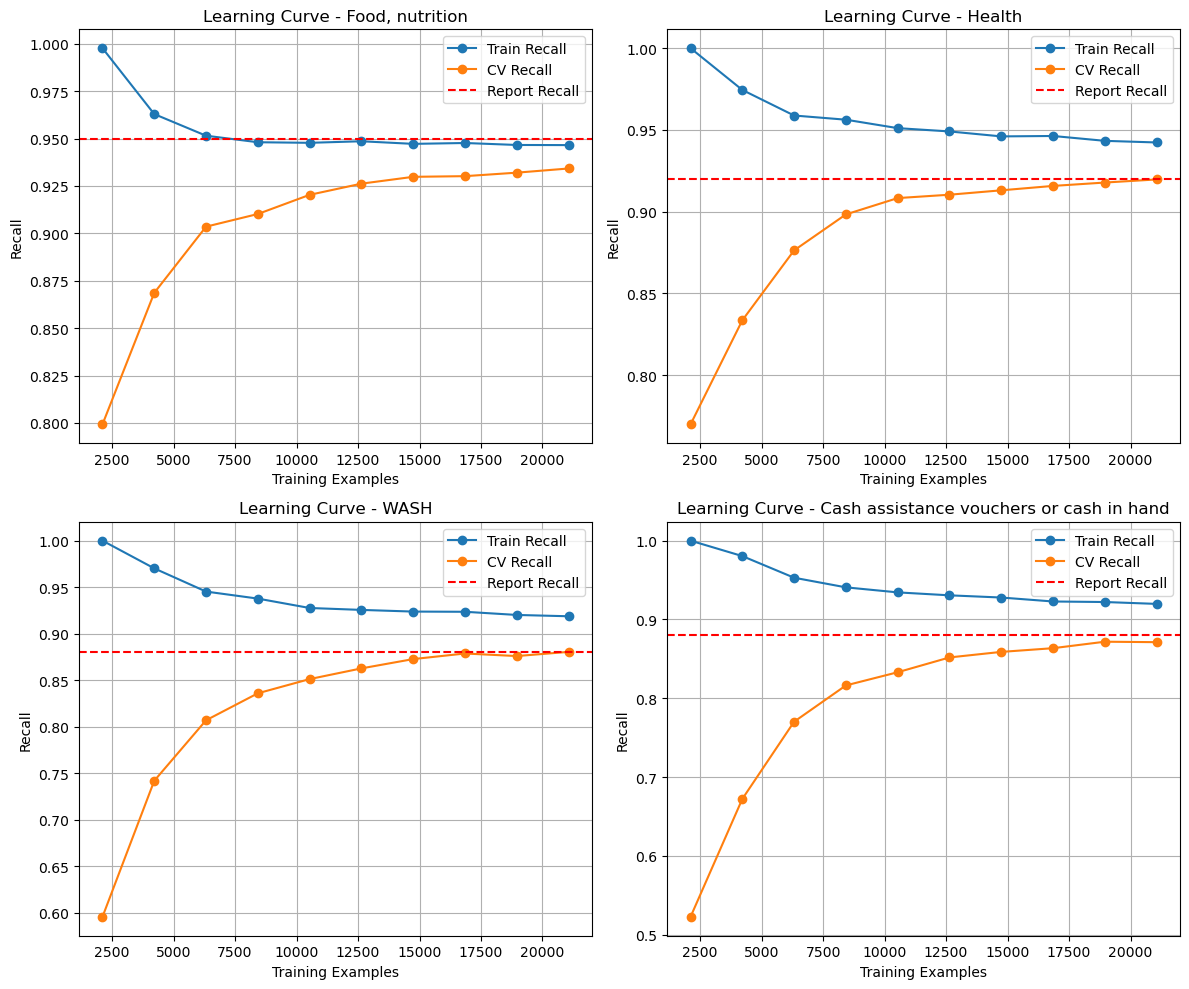

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

# Classification Report recall values
report_recall = {
    "Food, nutrition": 0.95,
    "Health": 0.92,
    "WASH": 0.88,
    "Cash assistance vouchers or cash in hand": 0.88
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(target.columns):
    y_train_feature = Y_train[col]
    estimator = LinearSVC(random_state=1234, C=1.0, max_iter=5000, class_weight='balanced')
    
    train_sizes, train_scores, cv_scores = learning_curve(
        estimator, X_train, y_train_feature, cv=5, scoring='recall',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    cv_mean = np.mean(cv_scores, axis=1)
    
    axes[idx].plot(train_sizes, train_mean, 'o-', label='Train Recall')
    axes[idx].plot(train_sizes, cv_mean, 'o-', label='CV Recall')
    
    # Plot horizontal line for classification report recall
    recall_val = report_recall.get(col)
    if recall_val is not None:
        axes[idx].axhline(y=recall_val, color='red', linestyle='--', label='Report Recall')
    
    axes[idx].set_title(f"Learning Curve - {col}")
    axes[idx].set_xlabel("Training Examples")
    axes[idx].set_ylabel("Recall")
    axes[idx].grid(True)
    axes[idx].legend(loc='best')

plt.tight_layout()
plt.show()


recall is the key metric for your problem. For imbalanced datasets or cases where false negatives are critical, recall provides valuable insights that accuracy might miss